In [7]:
import pandas as pd
import numpy as np
import importlib

import gru_data_pipeline as gdp
importlib.reload(gdp)

<module 'gru_data_pipeline' from 'c:\\Users\\almog\\repos\\AirBnb-Reviews\\gru_data_pipeline.py'>

In [11]:
paths = gdp.get_input_paths()
train_dfs, test_dfs = gdp.read_data(paths)
# concatenating the data from all cities in the dataset
train_data_raw, test_data_raw = gdp.concat_data(train_dfs, test_dfs)

./dataset\london_test.csv
./dataset\london_train.csv
./dataset\nyc_test.csv
./dataset\nyc_train.csv


In [18]:
import matplotlib.pyplot as plt

def plot_stats(statistics_over_time, statistics_negative_over_time):
  """plot the aggregated statistics for positive and negative class sentiment over time"""

  figsize = (10, 5)
  statistics_over_time["count"].plot(kind = "line", marker = "o", figsize = figsize)
  plt.grid()
  plt.title("Number of comments over time")

  statistics_negative_over_time["sum"].plot(kind = "line", marker = "o", figsize = figsize)
  plt.grid()
  plt.title("Number of negative comments over time")

  statistics_over_time["mean"].plot(kind = "line", marker = "o", figsize = figsize)
  plt.grid()
  plt.title("percentage of positive comments over time")


def plot_legend(ax):
    ax.spines[:].set_visible(False)
    ax.set_xticks([])
    ax.xaxis.set_tick_params(length=0,labelbottom=True)

In [13]:
train_data_raw["date"] = pd.to_datetime(train_data_raw.date)
train_data_raw["negative_class"] = (train_data_raw.polarity_class == 0).astype(int)
statistics_over_time = train_data_raw.sort_values(["city", "date"]).groupby(["city", "date"]).polarity_class.agg(sum='sum', mean='mean', count='count').unstack(level=0)
statistics_negative_over_time = train_data_raw.sort_values(["city", "date"]).groupby(["city", "date"]).negative_class.agg(sum='sum', mean='mean', count='count').unstack(level=0)

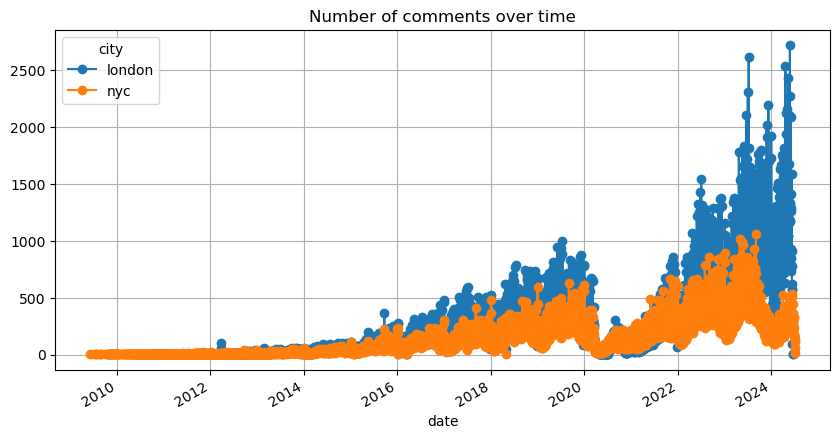

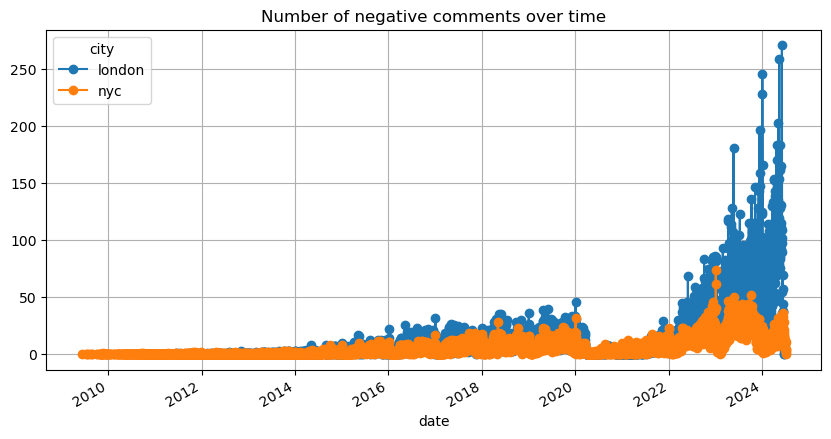

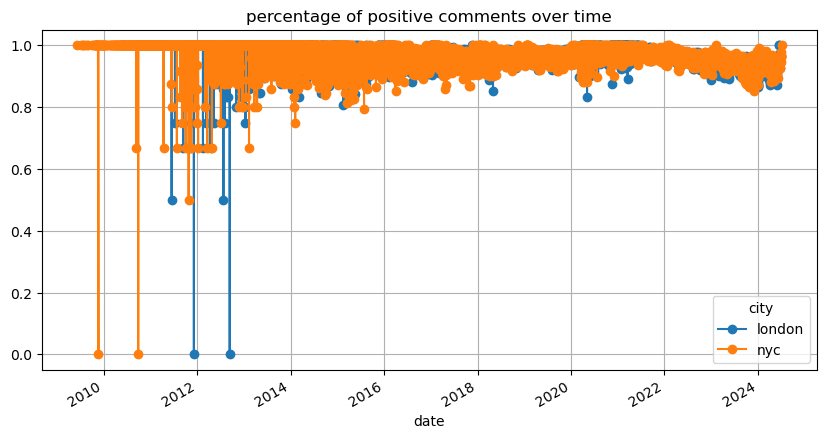

In [14]:
plot_stats(statistics_over_time, statistics_negative_over_time)

Now let's smooth it a little by aggregating over each month instead of each day to get more readible results.

In [15]:
train_data_raw["date_partial"] = pd.to_datetime(pd.to_datetime(train_data_raw.date).dt.strftime('%Y-%m'))
statistics_over_time_part = train_data_raw.sort_values(["city", "date_partial"]).groupby(["city", "date_partial"]).polarity_class.agg(sum='sum', mean='mean', count='count').unstack(level=0)
statistics_negative_over_time_part = train_data_raw.sort_values(["city", "date_partial"]).groupby(["city", "date_partial"]).negative_class.agg(sum='sum', mean='mean').unstack(level=0)

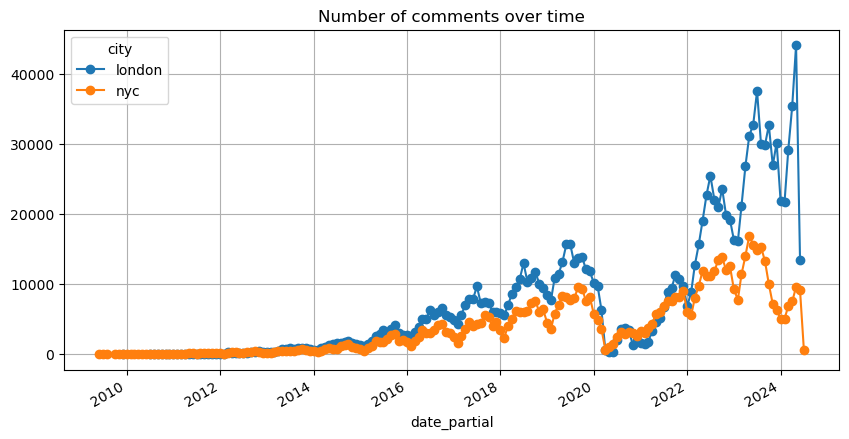

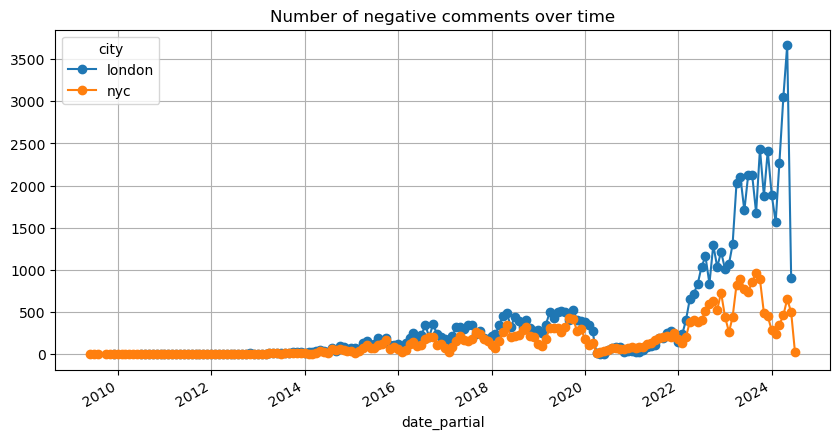

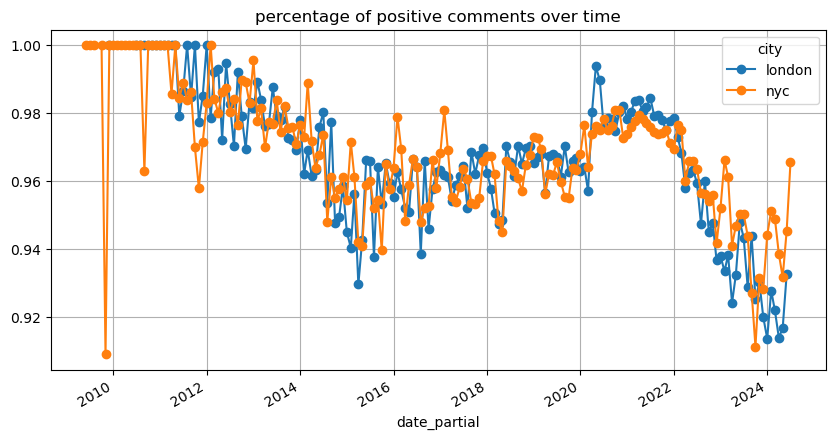

In [16]:
plot_stats(statistics_over_time_part, statistics_negative_over_time_part)

From the above graphs for the count of people using AIrbnb in both london and nyc, it is obvious that there are both seasonality and trend, the seasonality happens from having two peaks each year for the number of visits and it seems recurring exceps in 2020 where there happened a huge drop at the same time of the lockdown across the world. the trend is shown as the curve of counts have an upward trend in general till mid 2023 where the pattern is occuring but with higher values each year.In general london has higher number of comments each year and the gap grew larger by mid 2023 which needs more investigation.

The graph below is the average polarity, which means that we count the number of positive comments and divide it by the total number of comments per month per year per city. It shows that the mean is always above 90% but this doesn't mean that there are no satisfied people, it just means that the mean is shifted towards the majority class, and since most of the people have positive comments sentiment, the percentage of positive sentiment is high.

There is also some pattern in the percentage of positive sentiment, it becomes higher when the number (count) of reviews increases and this is obvious at most of 2009-2012 and the drop in counts in 2020, where the percentage of positive centiment increased segnificantly.

Further investigating the trend and seasonality below.

In [17]:
date_range = pd.date_range(start='2009-01-01', end=pd.Timestamp.now(), freq='M')
dates= pd.DataFrame(date_range, columns = ["date_partial"])
dates = pd.to_datetime(pd.to_datetime(dates.date_partial).dt.strftime('%Y-%m'))

C:\Users\almog\AppData\Local\Temp\ipykernel_7820\1546736865.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2009-01-01', end=pd.Timestamp.now(), freq='M')


In [20]:
def plot_legend(ax):
    ax.spines[:].set_visible(False)
    ax.set_xticks([])
    ax.xaxis.set_tick_params(length=0,labelbottom=True)


def plot_city(statistics_over_time_part, dates, cities, metric):
    for idx, year in enumerate(range(2015, 2023)):
        ax = plt.subplot(15, 1, idx + 1)

        for city in cities:
            df_city = statistics_over_time_part[metric].reset_index()[["date_partial", city]].fillna(0)
            query = df_city.merge(dates, how = "right", on = "date_partial")
            query["year"] = pd.to_datetime(query.date_partial).dt.year

            query_city = query.query(f"year == {year}")[["date_partial", city]].set_index("date_partial")
            query_city.plot(kind = "line", marker = "o", figsize = (10, 60), ax = ax)

            if metric == 'sum':
                metrix_str = "count"
            else:
            
            plt.title(f"{city} monthly {metrix_str} in {year}")
            plt.xlabel("")
            plot_legend(ax)
            plt.grid()

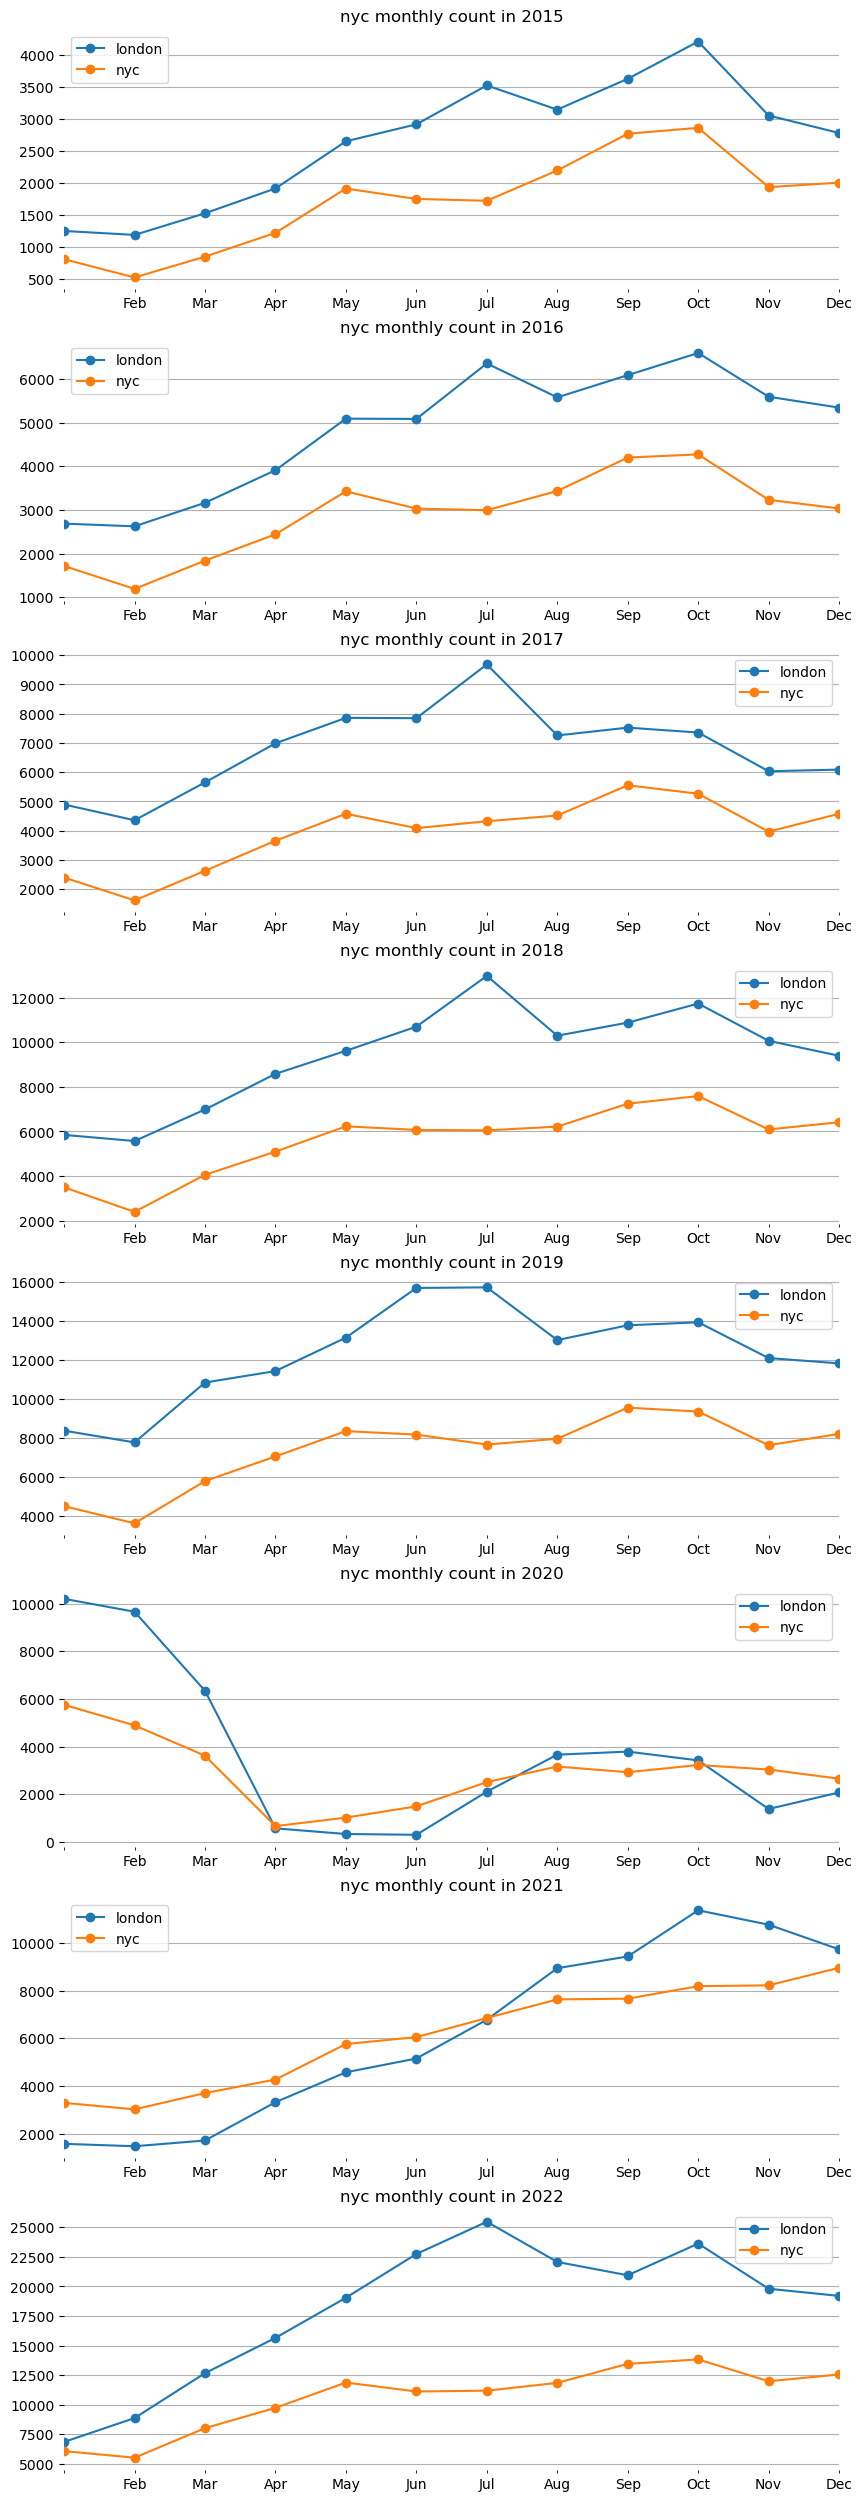

In [21]:
plot_city(statistics_over_time_part, dates, ["london", "nyc"], "count")

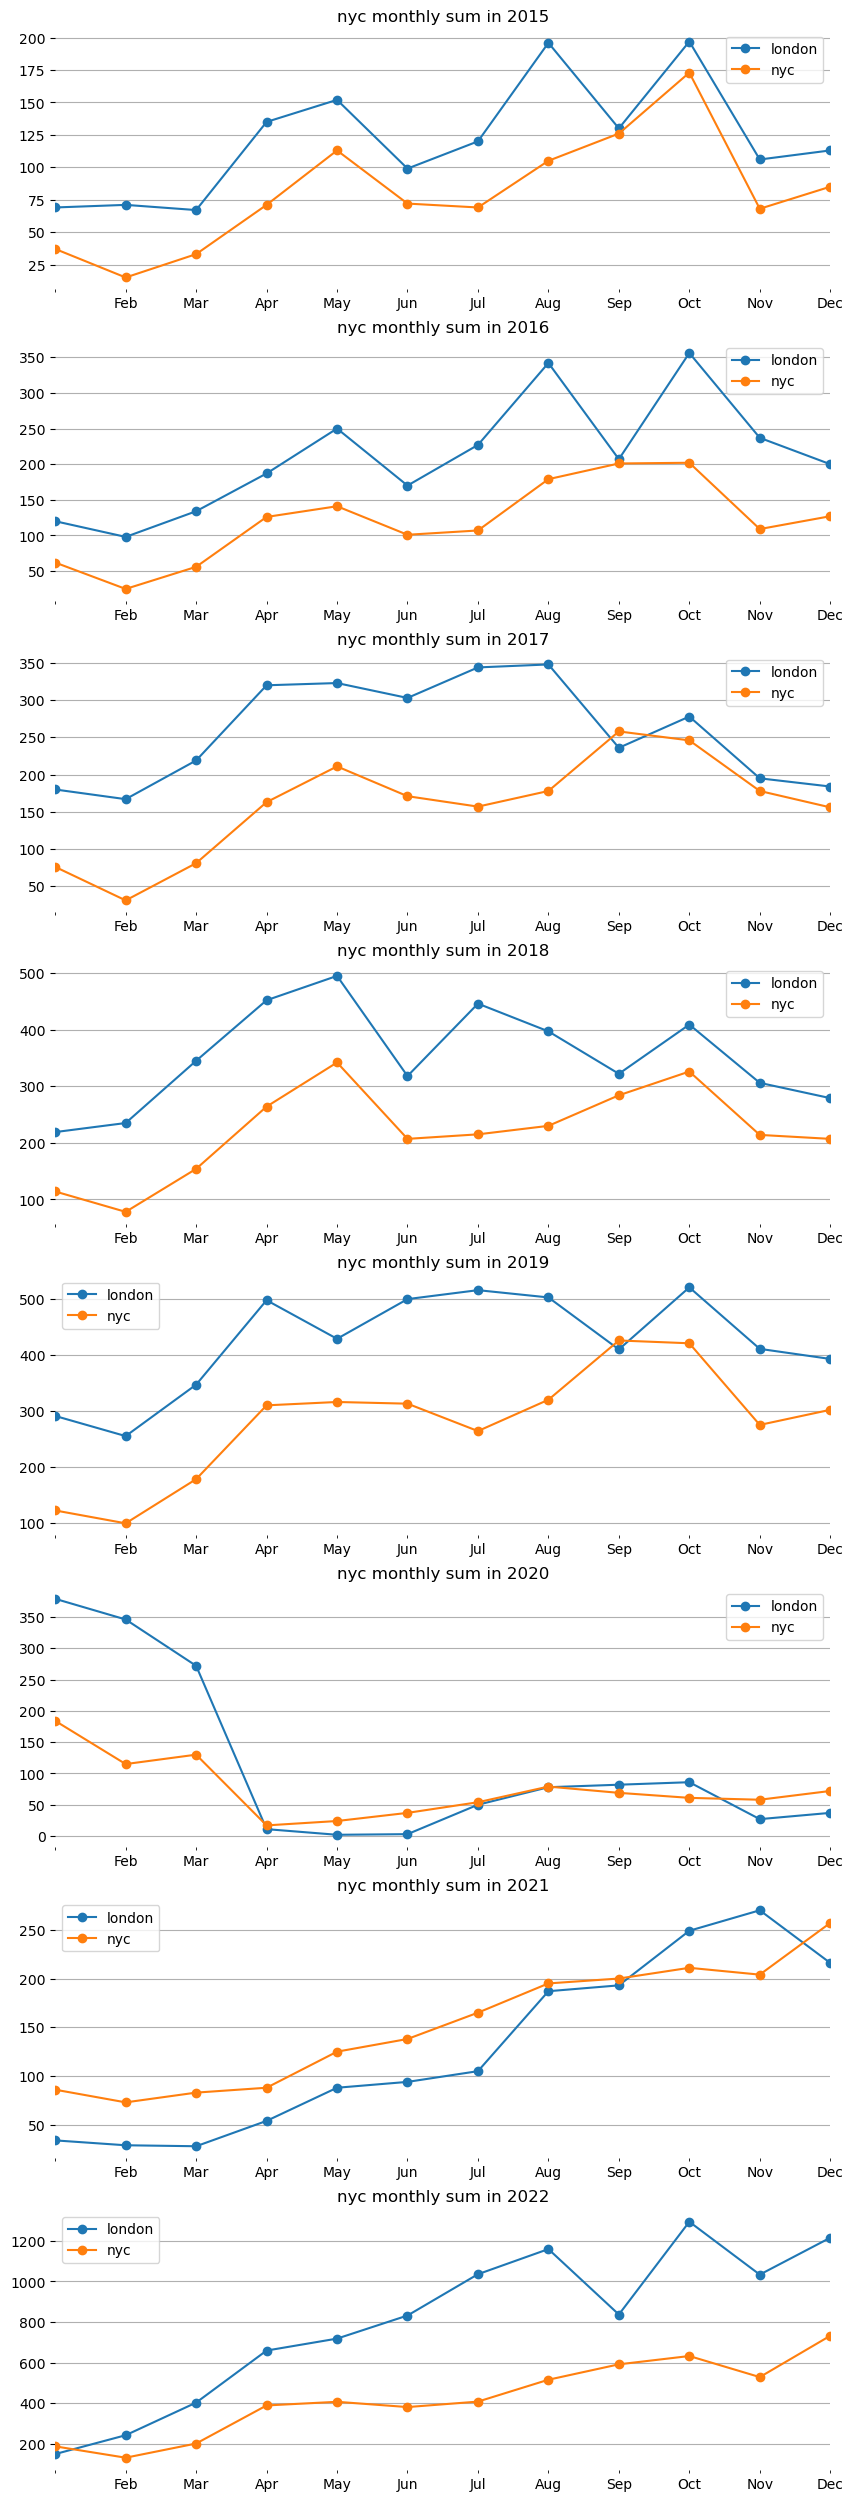

In [22]:
plot_city(statistics_negative_over_time_part, dates, ["london", "nyc"], "sum")